In [1]:
import csv
import math
import os
from math import pi, isnan

import matplotlib
import numpy
import pandas
from matplotlib.patches import Rectangle

from constants import *

from only_front.test import *
from only_front.env_front_lidar import Env
from only_front.env_front_lidar_without_eps import Env as Env_without_eps
from matplotlib import pyplot
from matplotlib.patches import Rectangle
%matplotlib inline






pygame 2.1.3.dev8 (SDL 2.0.22, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
N = 3
sensor_range = 20
ROBOT_RADIUS = 0.1
Dx, Dy = desiredXYSquarePattern(N, 5)
env = Env(250, 250, 210, 160, N * N, Dx, Dy, sensor_range, 20, 20, ROBOT_RADIUS, SENSOR_DETECTION_COUNT, 5000000)
    # env.addObstacle(50, 0, 60, 200)
env.addObstacle(50, 0, 60, 80)
env.addObstacle(50, 100, 60, 220)

env.addObstacle(100, 40, 220, 50)

env.addObstacle(100, 50, 110, 180)
env.addObstacle(100, 200, 110, 250)

env.addObstacle(170, 100, 180, 220)

env.addObstacle(200, 100, 250, 110)

In [5]:
env.reset()
episode_gui(env,4.5, 10)

In [14]:
names = ['row','v', 'w', 't', 'alive_agent_count']
directory = '..\\..\\run_complex'
directory1 = '..\\..\\run_complex_1'
report_file_name="C:\\Users\\qyzyr\\Downloads\\report_complex.csv"#os.path.join(directory, 'report.csv')
report_file_name1=os.path.join(directory1, 'report.csv')
df=pandas.read_csv(report_file_name, names=names, header=None,  dtype=float)
df1=pandas.read_csv(report_file_name1, names=names, header=None,  dtype=float)


In [15]:
names = ['row','v', 'w', 't', 'alive_agent_count']
directory = '..\\..\\run_simple'
directory1 = '..\\..\\run_simple_1'
report_file_name="C:\\Users\\qyzyr\\Downloads\\report_simple.csv"#os.path.join(directory, 'report.csv')
report_file_name1=os.path.join(directory1, 'report.csv')
df_=pandas.read_csv(report_file_name, names=names, header=None,  dtype=float)
df1_=pandas.read_csv(report_file_name1, names=names, header=None,  dtype=float)

In [4]:
df1_5=df1[df1['w']==10]

In [5]:
df1_5_live=df1_5[df1_5['alive_agent_count']>0]

In [6]:
df1_5_live.sort_values('t').tail()

,row,v,w,t,alive_agent_count
403,403.0,0.4,10.0,1816.0,9.0
402,402.0,0.3,10.0,2663.0,9.0
401,401.0,0.2,10.0,3588.0,9.0
400,400.0,0.1,10.0,7256.0,9.0
444,444.0,4.5,10.0,NaN,9.0


In [16]:
df[df['w']==5]


,row,v,w,t,alive_agent_count
300,300.0,0.1,5.0,16143.0,9.0
301,301.0,0.2,5.0,8286.0,9.0
302,302.0,0.3,5.0,61903.0,9.0
303,303.0,0.4,5.0,1834.0,9.0
304,304.0,0.5,5.0,2024.0,9.0
...,...,...,...,...,...
395,395.0,9.6,5.0,NaN,0.0
396,396.0,9.7,5.0,NaN,0.0
397,397.0,9.8,5.0,NaN,0.0
398,398.0,9.9,5.0,NaN,0.0


In [17]:
df_to_plot_t_=df_.pivot(index='v', columns='w', values='t')
df_to_plot_s_=df_.pivot(index='v', columns='w', values='alive_agent_count')
# df1=df[df['w'].isin([1, 3, 5, 15, 30, 45])] #df[df['w']!=60  ][df['w']!=45 ][df['w']!=30][df['w']!=1]
df_to_plot_t=df.pivot(index='v', columns='w', values='t')
df_to_plot_s=df.pivot(index='v', columns='w', values='alive_agent_count')

In [18]:
df_to_plot_t1_=df1_.pivot(index='v', columns='w', values='t')
df_to_plot_s1_=df1_.pivot(index='v', columns='w', values='alive_agent_count')
# df1=df[df['w'].isin([1, 3, 5, 15, 30, 45])] #df[df['w']!=60  ][df['w']!=45 ][df['w']!=30][df['w']!=1]
df_to_plot_t1=df1.pivot(index='v', columns='w', values='t')
df_to_plot_s1=df1.pivot(index='v', columns='w', values='alive_agent_count')

Text(0.5, 1.0, 'w = 20')

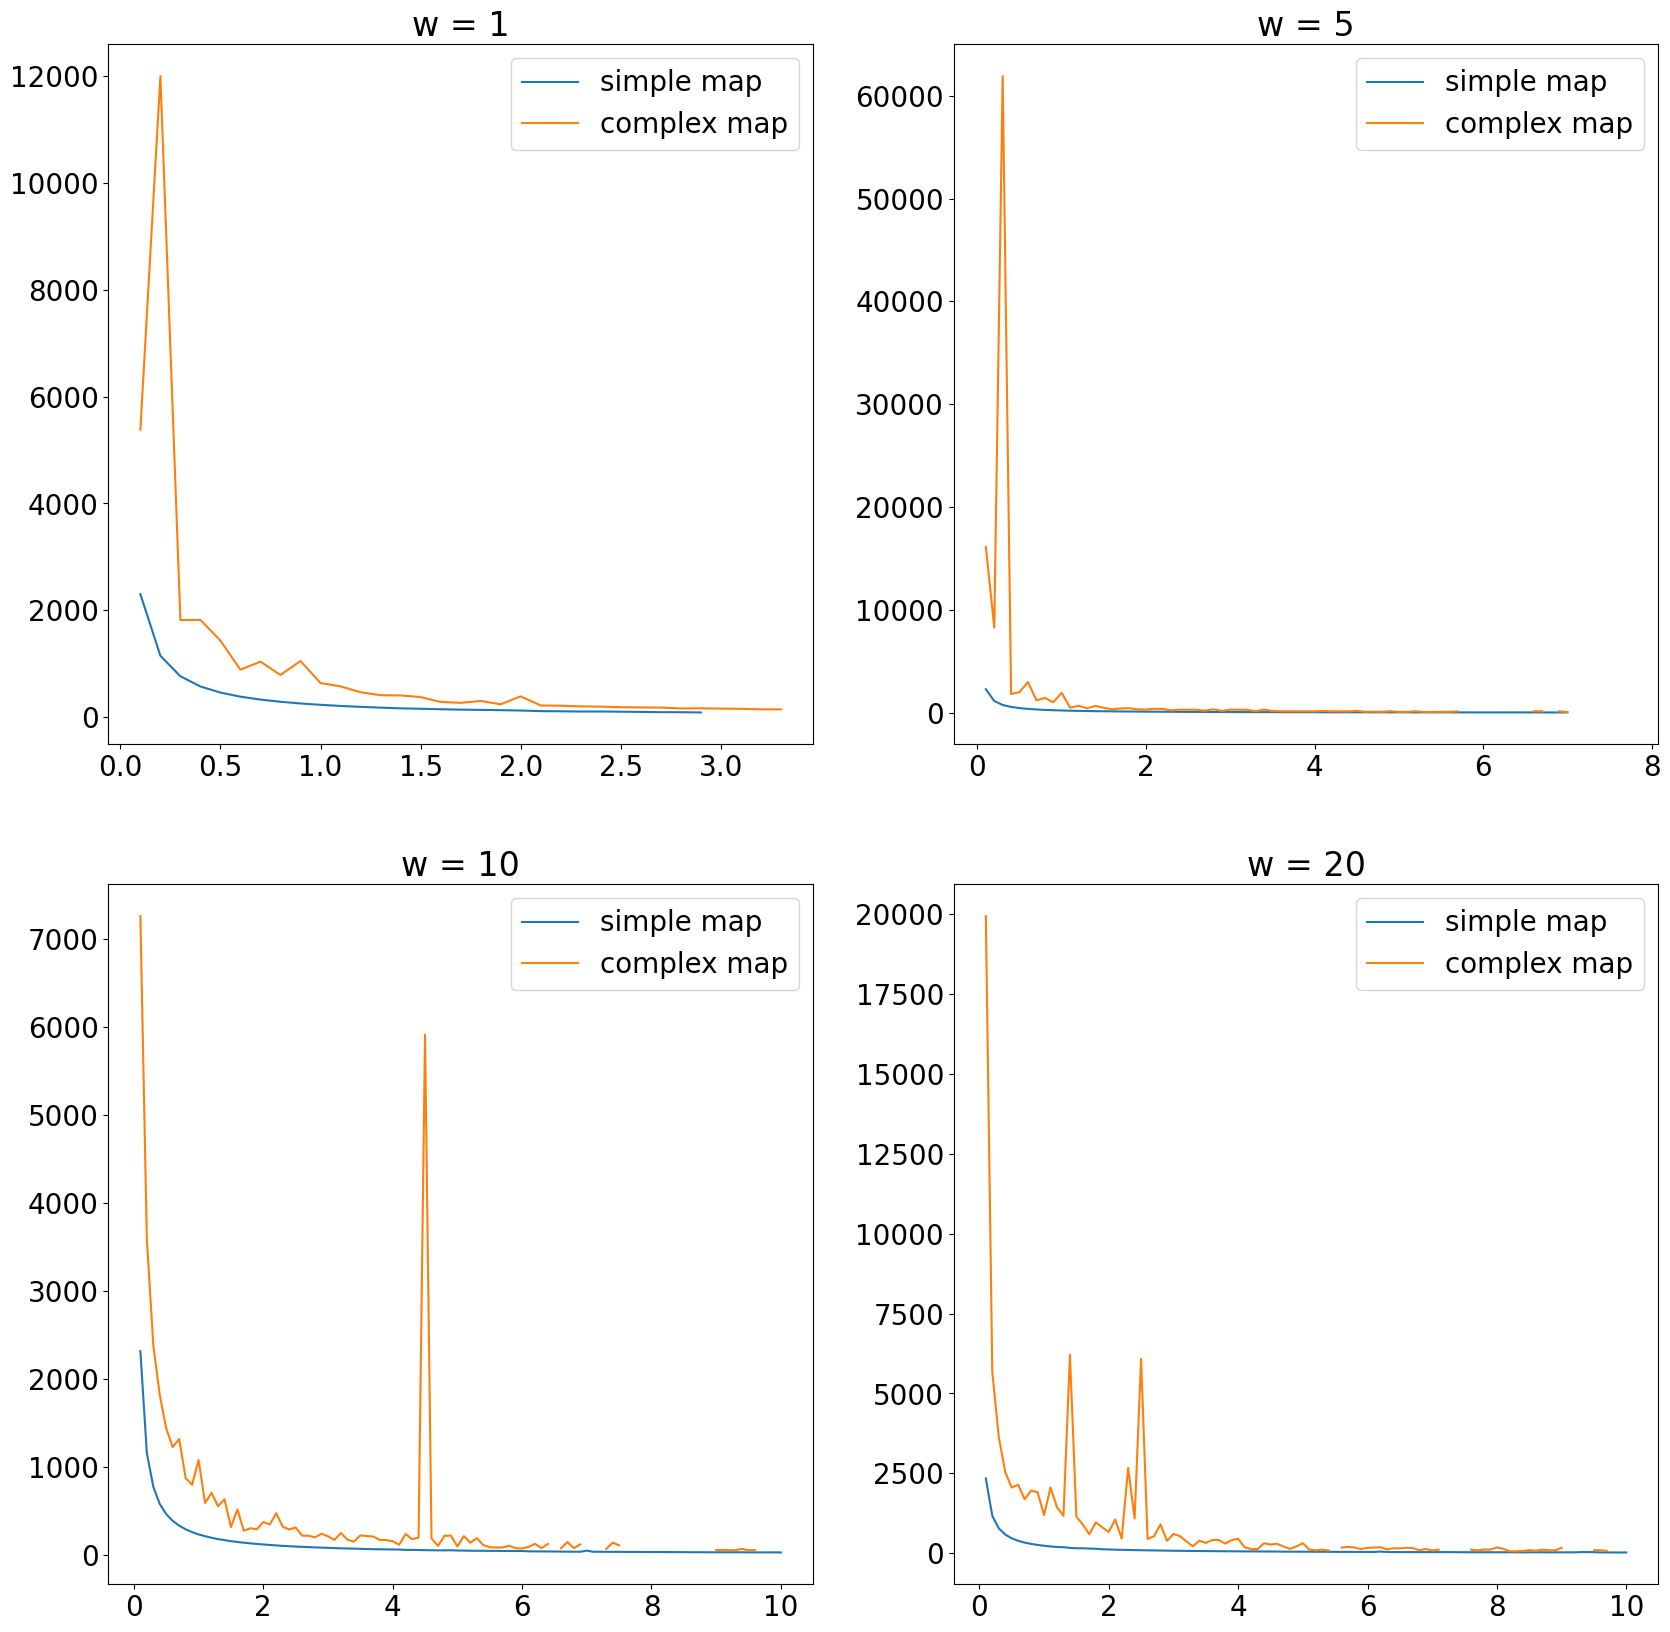

In [20]:
fig, axs= pyplot.subplots(2, 2, figsize=(20, 20))#1 3 5 15 30 45
matplotlib.rc('font', size=20)
w=1
ax=axs[0, 0]
# ax.plot(df_to_plot_t1_.index, df_to_plot_t1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_t1.index, df_to_plot_t1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_t_.index, df_to_plot_t_[w], label='simple map')
ax.plot(df_to_plot_t.index, df_to_plot_t[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=5
ax=axs[0, 1]
# ax.plot(df_to_plot_t1_.index, df_to_plot_t1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_t1.index, df_to_plot_t1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_t_.index, df_to_plot_t_[w], label='simple map')
ax.plot(df_to_plot_t.index, df_to_plot_t[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=10
ax=axs[1, 0]
# ax.plot(df_to_plot_t1_.index, df_to_plot_t1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_t1.index, df_to_plot_t1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_t_.index, df_to_plot_t_[w], label='simple map')
ax.plot(df_to_plot_t.index, df_to_plot_t[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=20
ax=axs[1, 1]
# ax.plot(df_to_plot_t1_.index, df_to_plot_t1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_t1.index, df_to_plot_t1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_t_.index, df_to_plot_t_[w], label='simple map')
ax.plot(df_to_plot_t.index, df_to_plot_t[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))

Text(0.5, 1.0, 'w = 20')

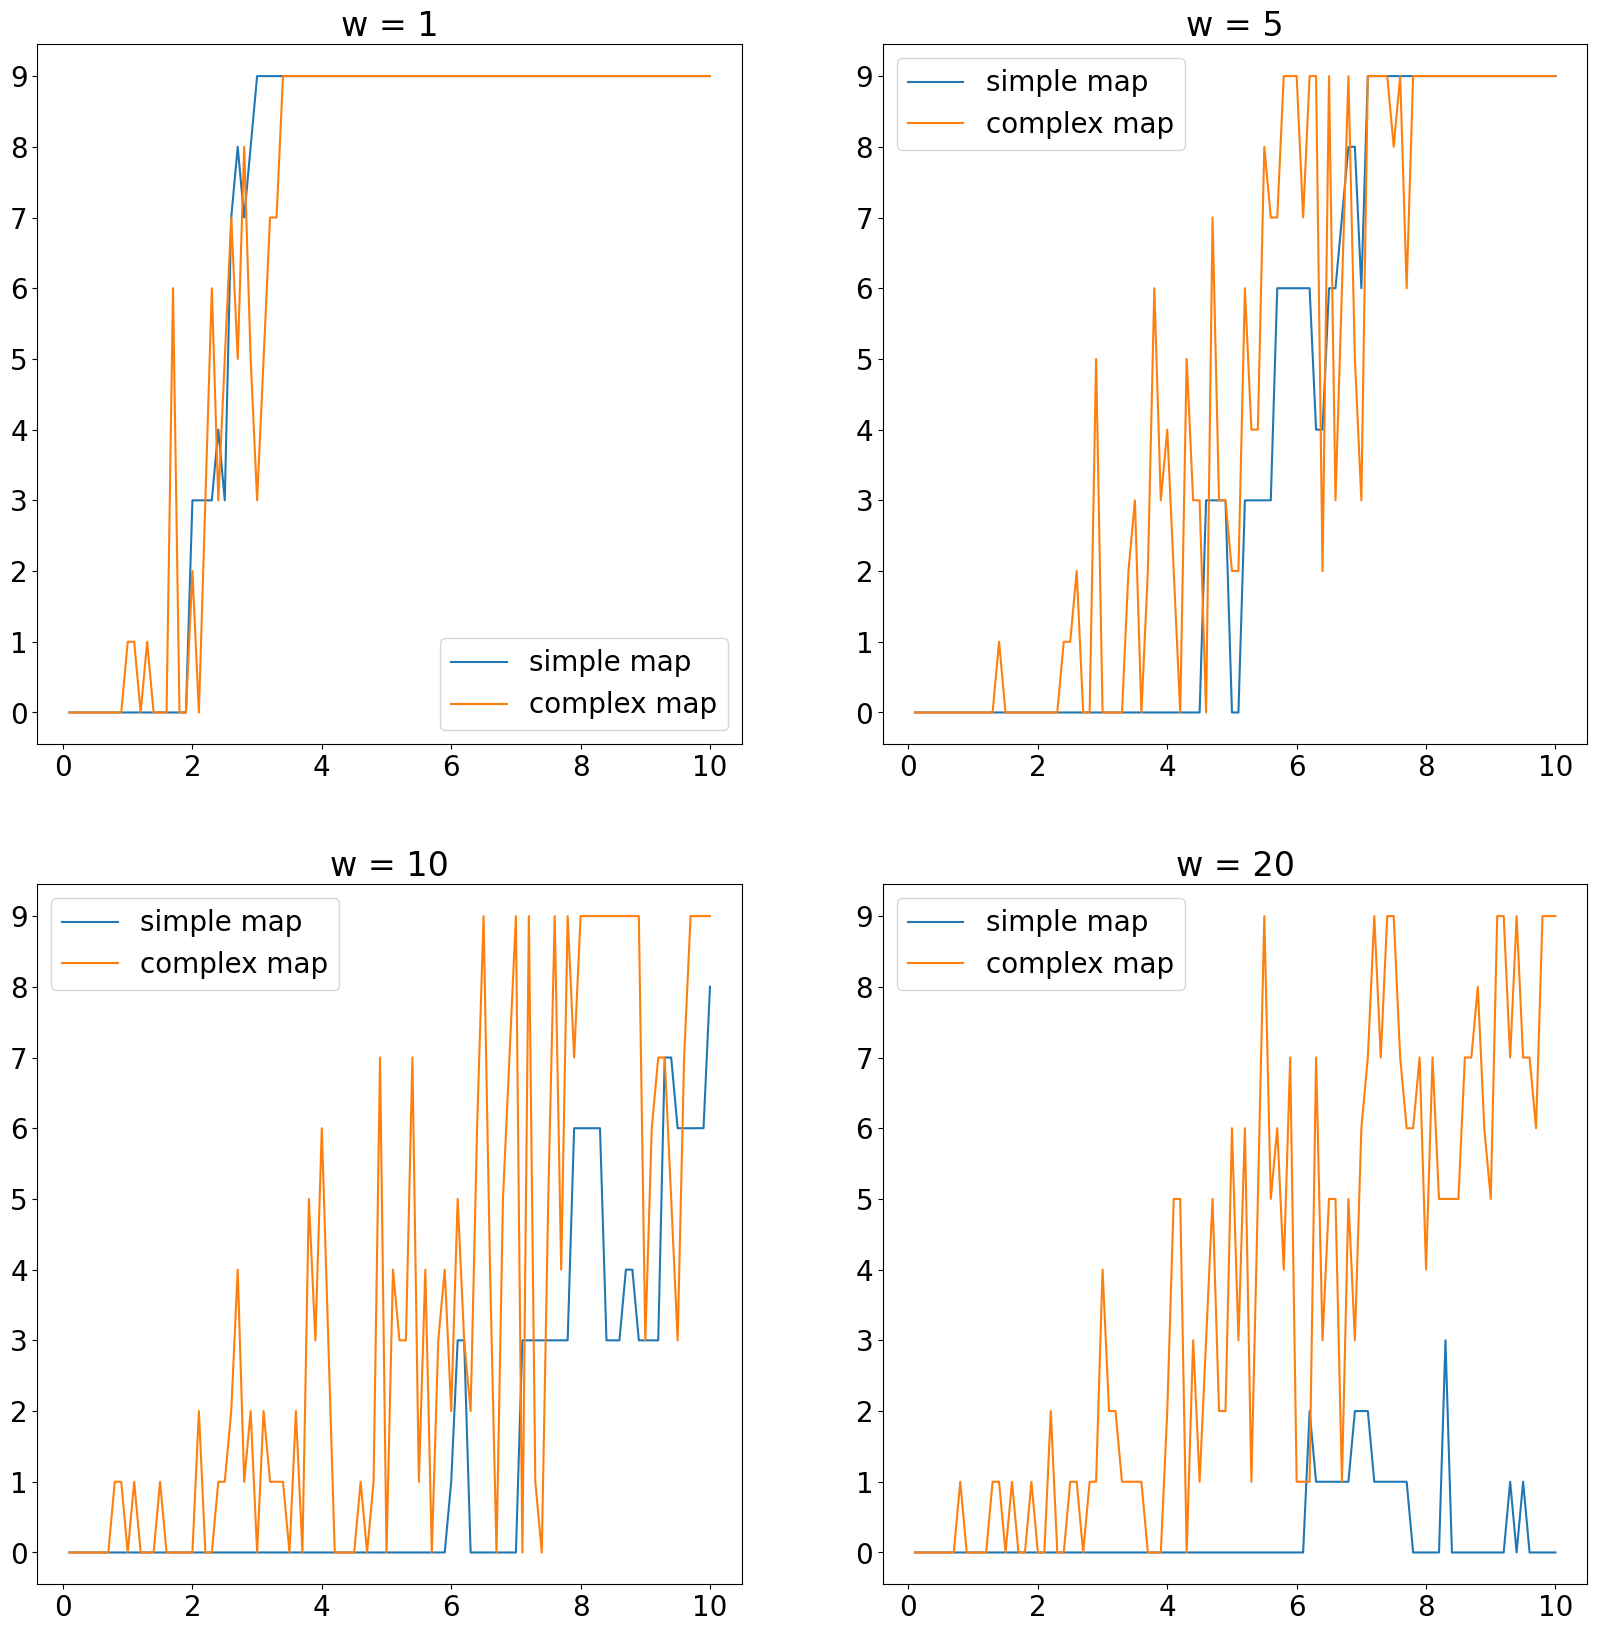

In [23]:
fig, axs= pyplot.subplots(2, 2, figsize=(20, 20))#1 3 5 15 30 45
matplotlib.rc('font', size=20)
df_to_plot_s_=9-df_to_plot_s_
df_to_plot_s=9-df_to_plot_s
df_to_plot_s1_=9-df_to_plot_s1_
df_to_plot_s1=9-df_to_plot_s1
w=1
ax=axs[0, 0]
ax.set_yticks([*range(10)])
# ax.plot(df_to_plot_s1_.index, df_to_plot_s1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_s1.index, df_to_plot_s1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_s_.index, df_to_plot_s_[w], label='simple map')
ax.plot(df_to_plot_s.index, df_to_plot_s[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=5
ax=axs[0, 1]
ax.set_yticks([*range(10)])

# ax.plot(df_to_plot_s1_.index, df_to_plot_s1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_s1.index, df_to_plot_s1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_s_.index, df_to_plot_s_[w], label='simple map')
ax.plot(df_to_plot_s.index, df_to_plot_s[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=10
ax=axs[1, 0]
ax.set_yticks([*range(10)])

# ax.plot(df_to_plot_s1_.index, df_to_plot_s1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_s1.index, df_to_plot_s1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_s_.index, df_to_plot_s_[w], label='simple map')
ax.plot(df_to_plot_s.index, df_to_plot_s[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))
w=20
ax=axs[1, 1]
ax.set_yticks([*range(10)])

# ax.plot(df_to_plot_s1_.index, df_to_plot_s1_[w], label='simple map without epsilon greedy')
# ax.plot(df_to_plot_s1.index, df_to_plot_s1[w], label='complex map without epsilon greedy')
ax.plot(df_to_plot_s_.index, df_to_plot_s_[w], label='simple map')
ax.plot(df_to_plot_s.index, df_to_plot_s[w], label='complex map')

ax.legend()
ax.set_title('w = '+str(w))